In [35]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [36]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [37]:

len(words)


32033

In [38]:
chars= sorted(list(set(''.join(words))))

In [39]:
stoi={s:i+1 for i,s in enumerate(chars)}
stoi["."]=0
itos={i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [40]:
block_size=3
X,Y=[],[]
for w in words:
    context=[0]*block_size
    for ch in w +'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        context=context[1:]+[ix]
X=torch.tensor(X)
Y=torch.tensor(Y)
Y.shape

torch.Size([228146])

In [41]:
X[:3],Y[:3]

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13]]),
 tensor([ 5, 13, 13]))

In [92]:

block_size = 3

def build_dataset(words):  
  X, Y = [], []
  for w in words:


    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
   
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [42]:
C=torch.randn((27,2),requires_grad=True)

In [43]:
C[X]

tensor([[[ 1.1893, -0.9665],
         [ 1.1893, -0.9665],
         [ 1.1893, -0.9665]],

        [[ 1.1893, -0.9665],
         [ 1.1893, -0.9665],
         [ 1.5701,  1.3417]],

        [[ 1.1893, -0.9665],
         [ 1.5701,  1.3417],
         [-1.3827, -0.8364]],

        ...,

        [[ 0.6025, -0.9167],
         [ 0.6025, -0.9167],
         [-0.0943,  0.5165]],

        [[ 0.6025, -0.9167],
         [-0.0943,  0.5165],
         [ 0.6025, -0.9167]],

        [[-0.0943,  0.5165],
         [ 0.6025, -0.9167],
         [ 1.2712,  0.1180]]], grad_fn=<IndexBackward0>)

In [44]:
C[[0,0,5]]


tensor([[ 1.1893, -0.9665],
        [ 1.1893, -0.9665],
        [ 1.5701,  1.3417]], grad_fn=<IndexBackward0>)

In [45]:
emb=C[X]
emb.shape

torch.Size([228146, 3, 2])

In [47]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)

tensor([[ 1.1893, -0.9665,  1.1893, -0.9665,  1.1893, -0.9665],
        [ 1.1893, -0.9665,  1.1893, -0.9665,  1.5701,  1.3417],
        [ 1.1893, -0.9665,  1.5701,  1.3417, -1.3827, -0.8364],
        ...,
        [ 0.6025, -0.9167,  0.6025, -0.9167, -0.0943,  0.5165],
        [ 0.6025, -0.9167, -0.0943,  0.5165,  0.6025, -0.9167],
        [-0.0943,  0.5165,  0.6025, -0.9167,  1.2712,  0.1180]],
       grad_fn=<CatBackward0>)

In [48]:
emb.view(228146,6)

tensor([[ 1.1893, -0.9665,  1.1893, -0.9665,  1.1893, -0.9665],
        [ 1.1893, -0.9665,  1.1893, -0.9665,  1.5701,  1.3417],
        [ 1.1893, -0.9665,  1.5701,  1.3417, -1.3827, -0.8364],
        ...,
        [ 0.6025, -0.9167,  0.6025, -0.9167, -0.0943,  0.5165],
        [ 0.6025, -0.9167, -0.0943,  0.5165,  0.6025, -0.9167],
        [-0.0943,  0.5165,  0.6025, -0.9167,  1.2712,  0.1180]],
       grad_fn=<ViewBackward0>)

In [49]:
emb.shape[0]

228146

In [50]:
h=torch.tanh(emb.view(-1,6)@W1+b1)

In [51]:
h.shape

torch.Size([228146, 100])

In [135]:
C=torch.randn((27,10),requires_grad=True)
W1=torch.randn((30,200),requires_grad=True)
b1=torch.randn(200,requires_grad=True)
W2=torch.randn((200,27),requires_grad=True)
b2=torch.randn(27,requires_grad=True)

In [136]:
logits=h@W2+b2

In [137]:
counts=logits.exp()
prob=counts/counts.sum(1,keepdims=True)
prob

tensor([[9.9668e-01, 8.9543e-16, 5.1375e-20, 2.5329e-14, 2.3710e-17, 3.3403e-13,
         3.1260e-12, 1.2525e-15, 2.9254e-21, 2.5049e-13, 3.3144e-03, 8.5544e-15,
         7.6752e-24, 1.7625e-22, 6.9839e-15, 4.7336e-23, 3.7144e-23, 9.1981e-06,
         4.9280e-24, 1.5807e-07, 1.3143e-07, 1.1576e-12, 2.1031e-09, 4.3894e-17,
         5.8993e-14, 6.4933e-22, 6.1165e-30],
        [6.5168e-08, 1.1756e-01, 2.3966e-14, 1.1613e-08, 1.7394e-05, 1.0619e-07,
         5.2879e-07, 1.1621e-11, 4.2738e-20, 1.3853e-10, 1.6625e-01, 2.2008e-02,
         3.1519e-12, 4.4972e-11, 6.3360e-04, 4.7899e-06, 1.6262e-09, 9.3596e-06,
         2.5374e-15, 6.9328e-01, 6.4829e-05, 2.0923e-15, 4.7138e-07, 1.7048e-04,
         1.2468e-16, 2.1009e-06, 1.0511e-11],
        [2.1468e-08, 5.2374e-21, 1.9566e-16, 5.7781e-11, 1.2302e-05, 1.1768e-10,
         1.3281e-06, 1.1212e-08, 9.1315e-11, 2.8540e-13, 9.9991e-01, 8.1578e-14,
         1.3474e-10, 2.7503e-12, 1.2858e-16, 7.7969e-09, 7.6468e-12, 8.0084e-05,
         2.5728e-

In [138]:
loss=-prob[torch.arange(emb.shape[0]),Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [139]:
parameters=[C,W1,b1,W2,b2]

In [140]:
F.cross_entropy(logits,Y)
logits.shape

ValueError: Expected input batch_size (32) to match target batch_size (228146).

In [141]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [158]:
lri=[]
lossi=[]
stepi=[]
for i in range(30000):
    ix = torch.randint(0, Xtr.shape[0], (32,))#added this for minibatch
    emb=C[Xtr[ix]]
    h=torch.tanh(emb.view(-1,30)@W1+b1)
    logits=h@W2+b2
    loss=F.cross_entropy(logits,Ytr[ix])
    
    for p in parameters:
        p.grad=None
    loss.backward()
    #lr=lrs[i]
    lr=0.01
    for p in parameters:
        p.data+=-lr*p.grad
    
    #lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
print(loss.item())

2.242105007171631


In [159]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3083, grad_fn=<NllLossBackward0>)

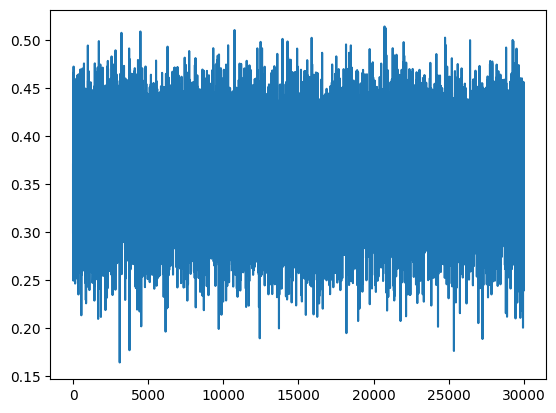

In [160]:

plt.plot(stepi, lossi)

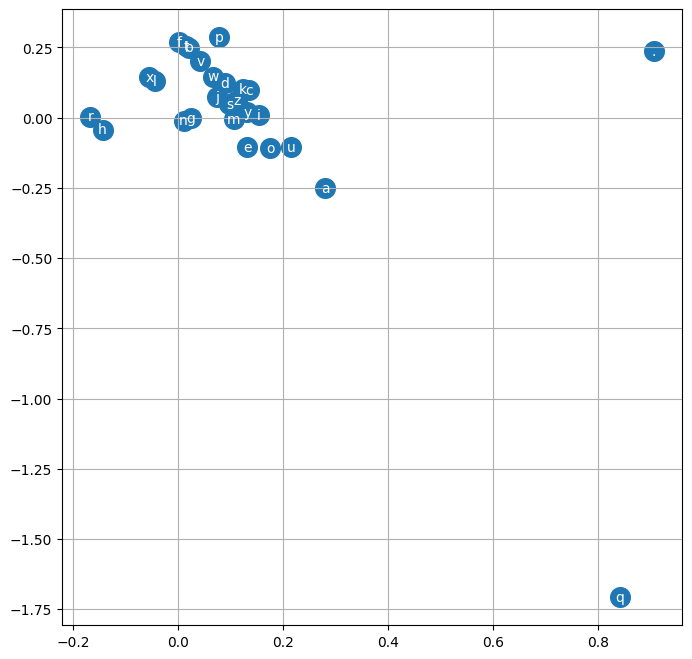

In [161]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [165]:
for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=None).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

shyunn.
kolle.
zes.
yosi.
hallya.
shris.
wiov.
kamiya.
lakyse.
jaksy.
gray.
jokroy.
hamce.
kha.
ter.
kaydenaysi.
pahlayly.
hom.
arhila.
abzitrix.
